# Lab 6: Poisson Distribution

In this lab, we will explore the statistics of counting.  This notebook is provided as a template, but you will need to add your own work to some cells, and certainly add many more cells.

In [1]:
import numpy as np
import scipy.misc as misc

In [2]:
from matplotlib import pyplot as plt
%matplotlib inline

Evaluate the following statement:
> The Poisson distribution represents an approimation to the binomial distribution for the special case where the average number of successes is much smaller than the possible number. (Bevington & Robinson 1992)

The following cell can be used as a numerical experiment.  Reverse engineer it in words, and set the variables such that the average number of successes is 3 as we did in class.  Show explicitly that you get the Poisson Distribution.


In [3]:
n_possible=10000
#p=np.zeros(20)
p=[0]
success=.01
print p
runs=10000
for i in range(10000):
    decay=(np.random.random(n_possible) < success).sum()
    try:
        p[decay]+=1.
    except IndexError:
        p=p+[0]*(decay-len(p)+1)
        p[decay]+=1.

prob=np.array(p)/n_possible

[0]


## Part 2:  Poisson to Gaussian

Taylor says that the Poisson distribution for the probability of $\nu$ counts occurring in a given time,
$$
P(\nu)=e^{-\mu} \frac{\mu^\nu}{\nu !},
$$
approaches the Gaussian distribution as the expected number of counts $\mu$ increases.  Plot the Poisson distribution for various values of $\mu$ to show that this is true.  

Start by plotting the Poisson distribution with small numbers, and make notes on what you see.  Explain why the plots make sense.

In [4]:
nu=np.arange(len(prob))
mu=success*n_possible
p=np.exp(-mu)*(mu**nu)/misc.factorial(nu)

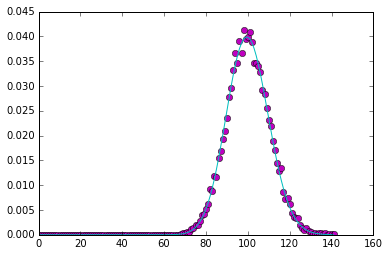

In [5]:
plt.plot(nu,prob,'mo')
plt.plot(nu,p,'c-')


Now overplot a Gaussian where the mean is $\mu$ and the standard deviation is $\sqrt{\mu}$.  Can you verify Taylor's claim?  If so, then you have shown that the uncertainty in a count number is the square root of that number.

## Part 3:  Measuring Geiger Counts

Measure the number of decays of C60 in 2 seconds using the instrument provided.  Now repeat the experiment 100 times.  Feel free to collaborate!  You may find it easy to save the data in a file.

In [6]:
 x=np.array([])
 x=np.loadtxt("Friday Lab 6 Data - Sheet1.csv")

Find the mean and standard deviation of the data.  Experiment with the histogram plots until you come up with a binning that you feel best represents the data.

In [7]:
avg=x.sum()/x.size
std=np.sqrt(np.sum((x-x.mean())**2)/x.size)

In [8]:
hist, bin_edges = np.histogram(x,density=1)
bin_centres = (bin_edges[:-1] + bin_edges[1:])/2

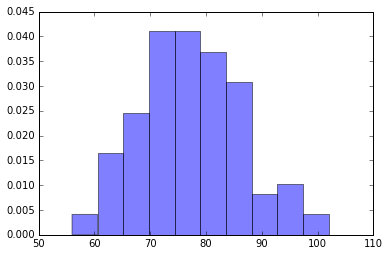

In [9]:
plt.hist(x,bins=bin_edges,normed=True,color='blue',alpha=0.5)
plt.show()

How does the standard deviation of the measurements compare to the square root of the mean number of counts?

In [10]:
print "the standard deviation is {0},\nthe square root of the mean is {1},\n thus the standard deviation is {2} of the root of the mean".format(std, np.sqrt(avg), std/np.sqrt(avg))

the standard deviation is 9.2758255609,
the square root of the mean is 8.79214915663,
 thus the standard deviation is 1.05501230651 of the root of the mean


These values are very close

How does the propagated error in each measurement contribute to the error of the mean in the averaging process?

$$\sigma_{\bar{x}}=\frac{\sigma_x}{\sqrt{N}}$$
Thus as error propogate through, the more uncertain the measurements, the greater the $\sigma_x$, the greater the $\sigma_{\bar{x}}$


Repeat the exercises above for just the first 20 points.  What do you notice?  How do the mean and standard deviation compare?

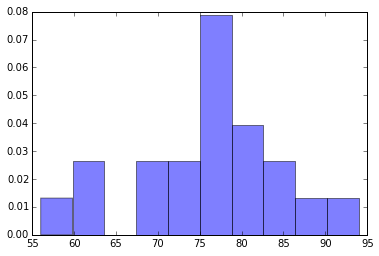

the standard deviation is 8.43489774686,
the square root of the mean is 8.69195029898,
 thus the standard deviation is 0.970426366548 of the root of the mean


In [23]:
xprime=(x[0:20:1])
avgprime=xprime.sum()/20.
stdprime=np.sqrt(np.sum((xprime-avgprime)**2)/20.)
histprime, bin_edgesprime = np.histogram(xprime,density=1)
bin_centresprime = (bin_edgesprime[:-1] + bin_edgesprime[1:])/2
plt.hist(xprime,bins=bin_edgesprime,normed=True,color='blue',alpha=0.5)
plt.show()
print "the standard deviation is {0},\nthe square root of the mean is {1},\n thus the standard deviation is {2} of the root of the mean".format(stdprime, np.sqrt(avgprime), stdprime/np.sqrt(avgprime))

Imagine that each 20-run set is one experiment.  Find the mean, the standard deviation, and standard deviation of the mean for each  of the resulting five experiments.  Show the results in a table.  Then calculate the standard deviation of the resulting five values of the mean.  Which values best represent the observed spread in the average value of the 5 experiments.

In [33]:
mean=[]
std=[]
sdom=[]
total=[]
print "mean \t\t std \t\t sdom\t\t total\n"
for i in range (0,5):
    temp=x[20*i:20*i+20:1]
    mean.append(np.mean(temp))
    std.append(np.std(temp))
    sdom.append(std[i]/np.sqrt(20.))
    total.append(np.sum(temp))
    print "{0}\t{1}\t{2}\t{3}\n".format(mean[i],std[i],sdom[i],total[i])
print "The standard deviation of the five values of the mean is {0}".format(np.std(mean))


mean 		 std 		 sdom		 total

75.55	8.43489774686	1.88610047452	1511.0

73.95	8.69180648657	1.94354701512	1479.0

77.35	7.69594048834	1.72086460827	1547.0

76.6	10.1360741907	2.26649509155	1532.0

80.35	8.07635437558	1.80592773942	1607.0

The standard deviation of the five values of the mean is 2.12706370379


unsurprisingly the standard deviation of the various means best estimates the standard deviation of the collection of means

What if, instead, you simply ran five 20 $\times$ 2 second = 40 second experiments?  What would be the uncertainty in each experiment?  Now use propagation of error to report the "2 second" count rate for each experiment.  What do you notice?

The uncertainty would be much higher with larger uncertainty in each number of counts $\sqrt{1500}>\sqrt{75}$ and there would be fewer samples in the denominator $\sqrt{5}<\sqrt{100}$, so the uncertainty would be higher.